In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, confusion_matrix,recall_score 
df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")

In [7]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack'] # under

In [8]:
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state = 0,stratify = y)
sampler = RandomUnderSampler(random_state=11)
x_train, y_train = sampler.fit_resample(xtrain, ytrain)

In [9]:
Tree_classifier = RandomForestClassifier(max_depth = 10,class_weight='balanced',random_state=0,)
Tree_classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [10]:
y_pred = Tree_classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41000 16447]
 [ 1007  4966]]
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     57447
         1.0       0.23      0.83      0.36      5973

    accuracy                           0.72     63420
   macro avg       0.60      0.77      0.59     63420
weighted avg       0.91      0.72      0.78     63420



In [11]:
recall_score(y_test,y_pred)

0.831408002678721

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 
danex = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
daney = Tree_classifier.feature_importances_

In [13]:
datafr = pd.DataFrame({"Feature":danex,
                      "Value":daney})

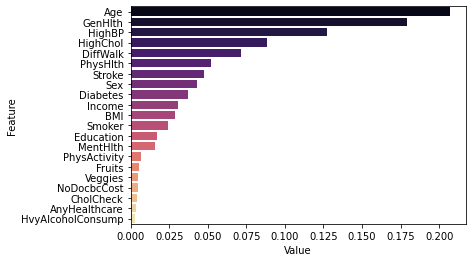

In [14]:
sns.barplot(x = 'Value',y='Feature', data = datafr,palette = 'magma',order=datafr.sort_values('Value',ascending = False).Feature)

plt.savefig('../Plots/TreeFeature2.png')

In [15]:
f = datafr.sort_values('Value',ascending = True).Feature


In [16]:
features = []
for i in f:
    features.append(i)
features

['HvyAlcoholConsump',
 'AnyHealthcare',
 'CholCheck',
 'NoDocbcCost',
 'Veggies',
 'Fruits',
 'PhysActivity',
 'MentHlth',
 'Education',
 'Smoker',
 'BMI',
 'Income',
 'Diabetes',
 'Sex',
 'Stroke',
 'PhysHlth',
 'DiffWalk',
 'HighChol',
 'HighBP',
 'GenHlth',
 'Age']

In [17]:
recall = []

df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")
x=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack'] # under
x1 = x
specifit = []
out=[]
avg = []
for i in range(len(features)):
    y = df['HeartDiseaseorAttack']
    print(f'ilosc features:{len(x1.columns)}')
    sampler = RandomUnderSampler(random_state=11)
    xtrain,x_test,ytrain,y_test = train_test_split(x1,y,random_state = 0,stratify = y)
    x_train, y_train = sampler.fit_resample(xtrain, ytrain)
    Tree_classifier = RandomForestClassifier(max_depth = 10,class_weight='balanced',random_state=0,)
    Tree_classifier.fit(x_train,y_train)
    y_pred = Tree_classifier.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    specifit.append(specificity)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    rec = recall_score(y_test,y_pred)
    av= (rec+ specificity) / 2
    avg.append(av)
    recall.append(rec)
    out.append(features[i])
    x1= x.drop(columns=out)

ilosc features:21
[[41000 16447]
 [ 1007  4966]]
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     57447
         1.0       0.23      0.83      0.36      5973

    accuracy                           0.72     63420
   macro avg       0.60      0.77      0.59     63420
weighted avg       0.91      0.72      0.78     63420

ilosc features:20
[[40995 16452]
 [ 1037  4936]]
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     57447
         1.0       0.23      0.83      0.36      5973

    accuracy                           0.72     63420
   macro avg       0.60      0.77      0.59     63420
weighted avg       0.91      0.72      0.78     63420

ilosc features:19
[[40795 16652]
 [  994  4979]]
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     57447
         1.0       0.23      0.83      0.36      5973

    accuracy                       

In [19]:
osX = []
for i in range(len(features)):
    osX.append(i)


osX.sort(reverse=True)


TypeError: refline() missing 1 required positional argument: 'self'

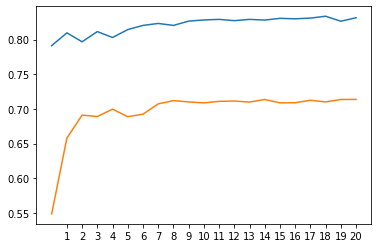

In [35]:
fig, ax = plt.subplots()
ax.set_xticks(range(1,21))
sns.lineplot(x = osX,y=recall,palette='magma')
sns.lineplot(x = osX,y=specifit,palette = 'magma')
sns.FacetGrid.refline(x=8)
plt.legend(['Czułość','Specyficzność'])
plt.ylabel('Recall/Specifity [%]')
plt.xlabel('Ilość cech [od najważniejszej do najmniej ważnych]')
plt.savefig('../Plots/Tree_Feature_recall.png')

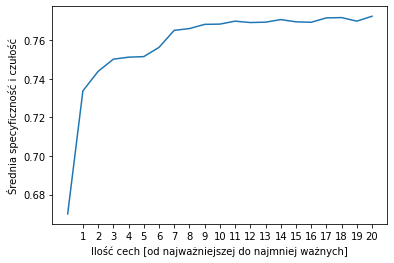

In [25]:
fig, ax = plt.subplots()
ax.set_xticks(range(1,21))
sns.lineplot(x = osX,y=avg,palette='magma')
plt.ylabel('Średnia specyficzność i czułość')
plt.xlabel('Ilość cech [od najważniejszej do najmniej ważnych]')
plt.savefig('../Plots/Tree_Feature_recall_avg.png')

In [15]:
#specyficznosc- znalezc funkcje albo napisac dla klasy 0 a recall(czulosc) dla 1
#2 krzywe dla klasy 0 i 1
#ten zbior ktory wybierzemy jest optymalny dla wszystkich klasyfikatorow
#czulosc specyficznosc robimy srednia i wykres, zrobic roznice jak nie beda sie przecinac
#przedstawienie np heatmapy, macierrzy itd na stronie.
#f1-score dodatkowo 
#krzywa roc
#AUC do kazdej liczby cech pole pod krzywą roc mowi o mocy klasyfikatora dla danych
#krzywa roc ostateczne wyniki dla foresta dla najlepszej cechy(prawdopodobienstwa)
#jak wyznaczyc (predict_proba) prog klasyfikacji mozna zmienic, 







In [27]:
diff = []
for i in range(len(recall)):
    difference = recall[i] - specifit[i]
    diff.append(difference)

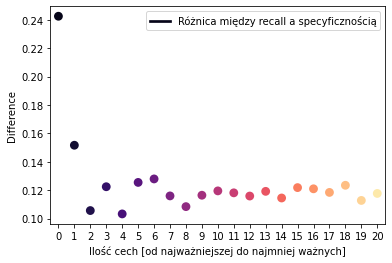

In [29]:

sns.pointplot(x = osX,y=diff,palette='magma')
plt.legend(['Różnica między recall a specyficznością'])
plt.ylabel('Difference')
plt.xlabel('Ilość cech [od najważniejszej do najmniej ważnych]')
plt.savefig('../Plots/Tree_Feature_recall_spec_difference.png')

In [87]:
xtrain,x_test,ytrain,y_test = train_test_split(x,y,random_state = 0,stratify = y)
sampler = RandomUnderSampler(random_state=11)
x_train, y_train = sampler.fit_resample(xtrain, ytrain)

In [88]:
Tree_classifier = RandomForestClassifier(max_depth = 10,class_weight='balanced',random_state=0,)
Tree_classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [56]:
y_pred = Tree_classifier.predict(x_test)

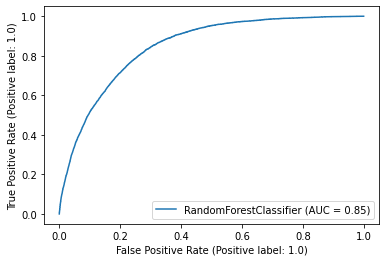

In [45]:
metrics.RocCurveDisplay.from_estimator(Tree_classifier, x_test, y_test)

In [21]:
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [90]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ValueError: y should be a 1d array, got an array of shape (63420, 2) instead.

In [89]:

y_pred = Tree_classifier.predict_proba(x_test)


/Users/adam/opt/miniconda3/envs/vivenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


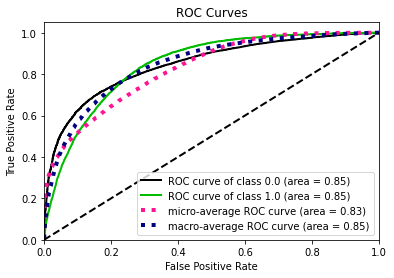

In [77]:

skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()